# Task 1
### Importing libraries and reading dataset

In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the dataset
data_initial= pd.read_csv('project1_ds.csv')

### Shape of dataframe

In [2]:
#shape of the data
data_initial.shape

(800, 16)

In [3]:
data_initial.head()

,Unnamed: 0,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,5,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195


### Dropping first and second columns

In [4]:
#dropping the first and second column
data = data_initial.iloc[:,2:]

In [5]:
#observing the first few dataset
data.head()

,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary,Win_rate,Type1_Win_rate
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,0.17,0.446002
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.36,0.446002
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.63,0.446002
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.58,0.446002
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,0.48,0.441195


In [6]:
data.describe()

,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Win_rate,Type1_Win_rate
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,706.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.473810,0.471075
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.266284,0.043434
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000,0.363225
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.240000,0.446002
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.460000,0.481159
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.700000,0.495605
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,0.980000,0.555501


### Columns containing categorical and qualitative data

In [7]:
#Columns with categories: [Name, Type1, Type2, Legendary, Generation]

#Columns with quantitative data: [Total, HP, Attack, Defense, Sp.Atk, Sp.Def, Speed, Win_rate, Type1_Win_rate]

# Task 2 
### Handling missing value and descriptive stat.

In [8]:
#listing all the na values in ascending order
data.isna().sum().sort_values()

Name                0
Type.1              0
Total               0
HP                  0
Attack              0
Defense             0
Sp..Atk             0
Sp..Def             0
Speed               0
Generation          0
Legendary           0
Type1_Win_rate      0
Win_rate           94
Type.2            386
dtype: int64

In [9]:
#Filling the NA's

#the win_rate can be filled using the median values for here however, Type.2 is pretty complicated. 

#median of the win_rate
med_winRate = data.Win_rate.median(skipna=True)

#now filling the missing 
data.Win_rate=data.Win_rate.fillna(value=med_winRate)

In [10]:
#Descrptive stat. of the whole dataframe containing the continuous-value
data.describe()

,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Win_rate,Type1_Win_rate
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.472187,0.471075
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.250170,0.043434
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.000000,0.363225
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.270000,0.446002
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.460000,0.481159
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.670000,0.495605
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,0.980000,0.555501


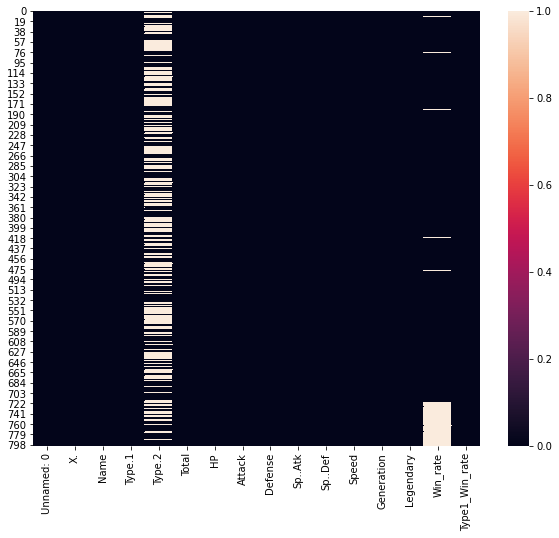

In [11]:
#Bonous: Visualizing the missing values of the original data
plt1 = plt.figure(figsize=(10,8))
sns.heatmap(data_initial.isnull())
#plt.savefig("missing_value.png")

# Task 3
### Analyzing Individual Variables

Text(0.5, 1.0, 'Count of the Type 1 Pokemon')

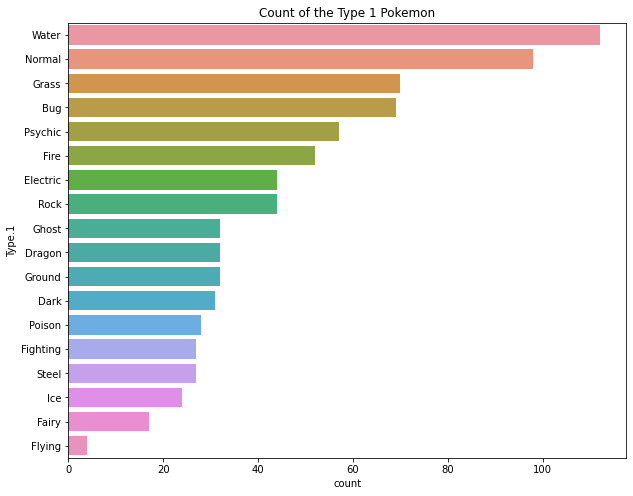

In [12]:
# Visualizing Type1 variable

plt.figure(figsize=(10,8))
sns.countplot(data=data, y=data['Type.1'], order= data['Type.1'].value_counts().index)
plt.title("Count of the Type 1 Pokemon")
#plt.savefig("type1_variable.png")
#Conclusion: The most of the type of pokemon presented in the data are 'Water' and the least are 'Flying'

Text(0.5, 1.0, 'Count of Type 2 Pokemon')

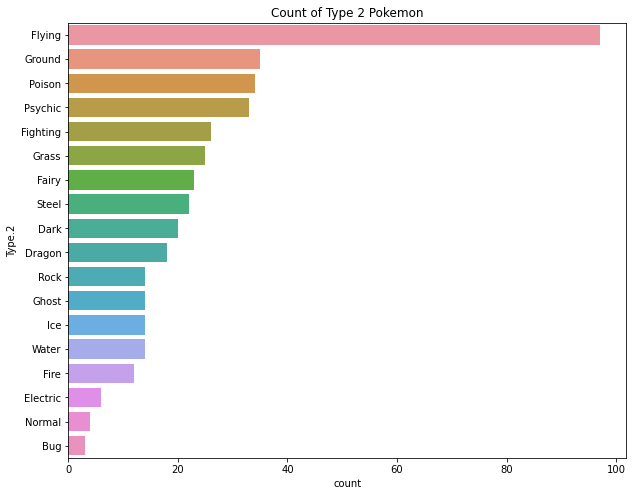

In [13]:
# Visualizing the 'Type2' variable

plt.figure(figsize=(10,8))
sns.countplot(data=data, y=data['Type.2'], order= data['Type.2'].value_counts().index)
plt.title("Count of Type 2 Pokemon")
#plt.savefig("type2_countplt.png")
#conclusion: On type 2 Flying seems to strom the chart whereas Bug remains in the bottom of the list. 

Text(0.5, 1.0, 'Count of Different Generation')

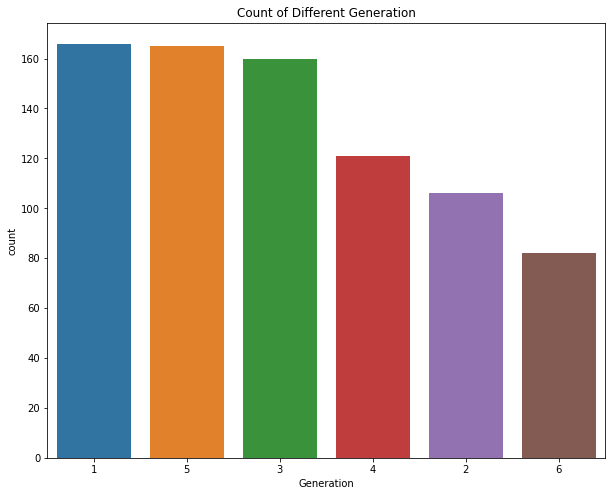

In [14]:
# Visualizing the 'Generation' of the pokemon
plt.figure(figsize=(10,8))
sns.countplot(data=data, x=data['Generation'], order= data['Generation'].value_counts().index)
plt.title("Count of Different Generation")
#plt.savefig("generation_count.png")
#conclusion: Generation 1 seems to be mostly present having head to head with generation 5 and 3. Generation 6 is at bottom. 

Text(0.5, 1.0, 'Legendary or not.png')

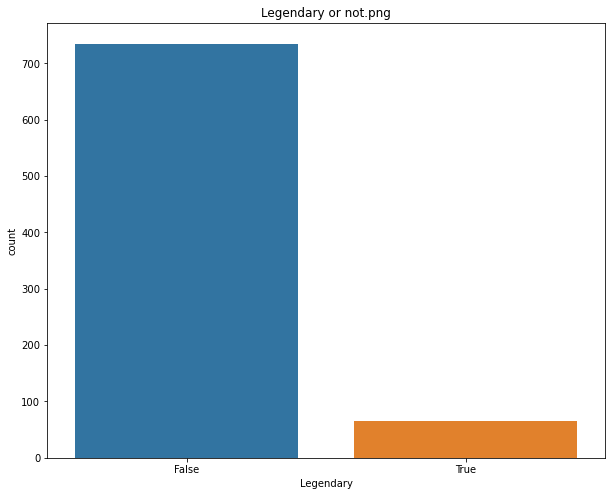

In [15]:
# Visualizing the 'Legendery' variable
plt.figure(figsize=(10,8))
sns.countplot(x=data.Legendary)
plt.title("Legendary or not.png")
#plt.savefig("Legendary_count.png")
#Conclusion: We have imbalanced data in regarding to the Legendary variable as the 'False' value is way higher than 'True'

### Distribution of quantitative variables

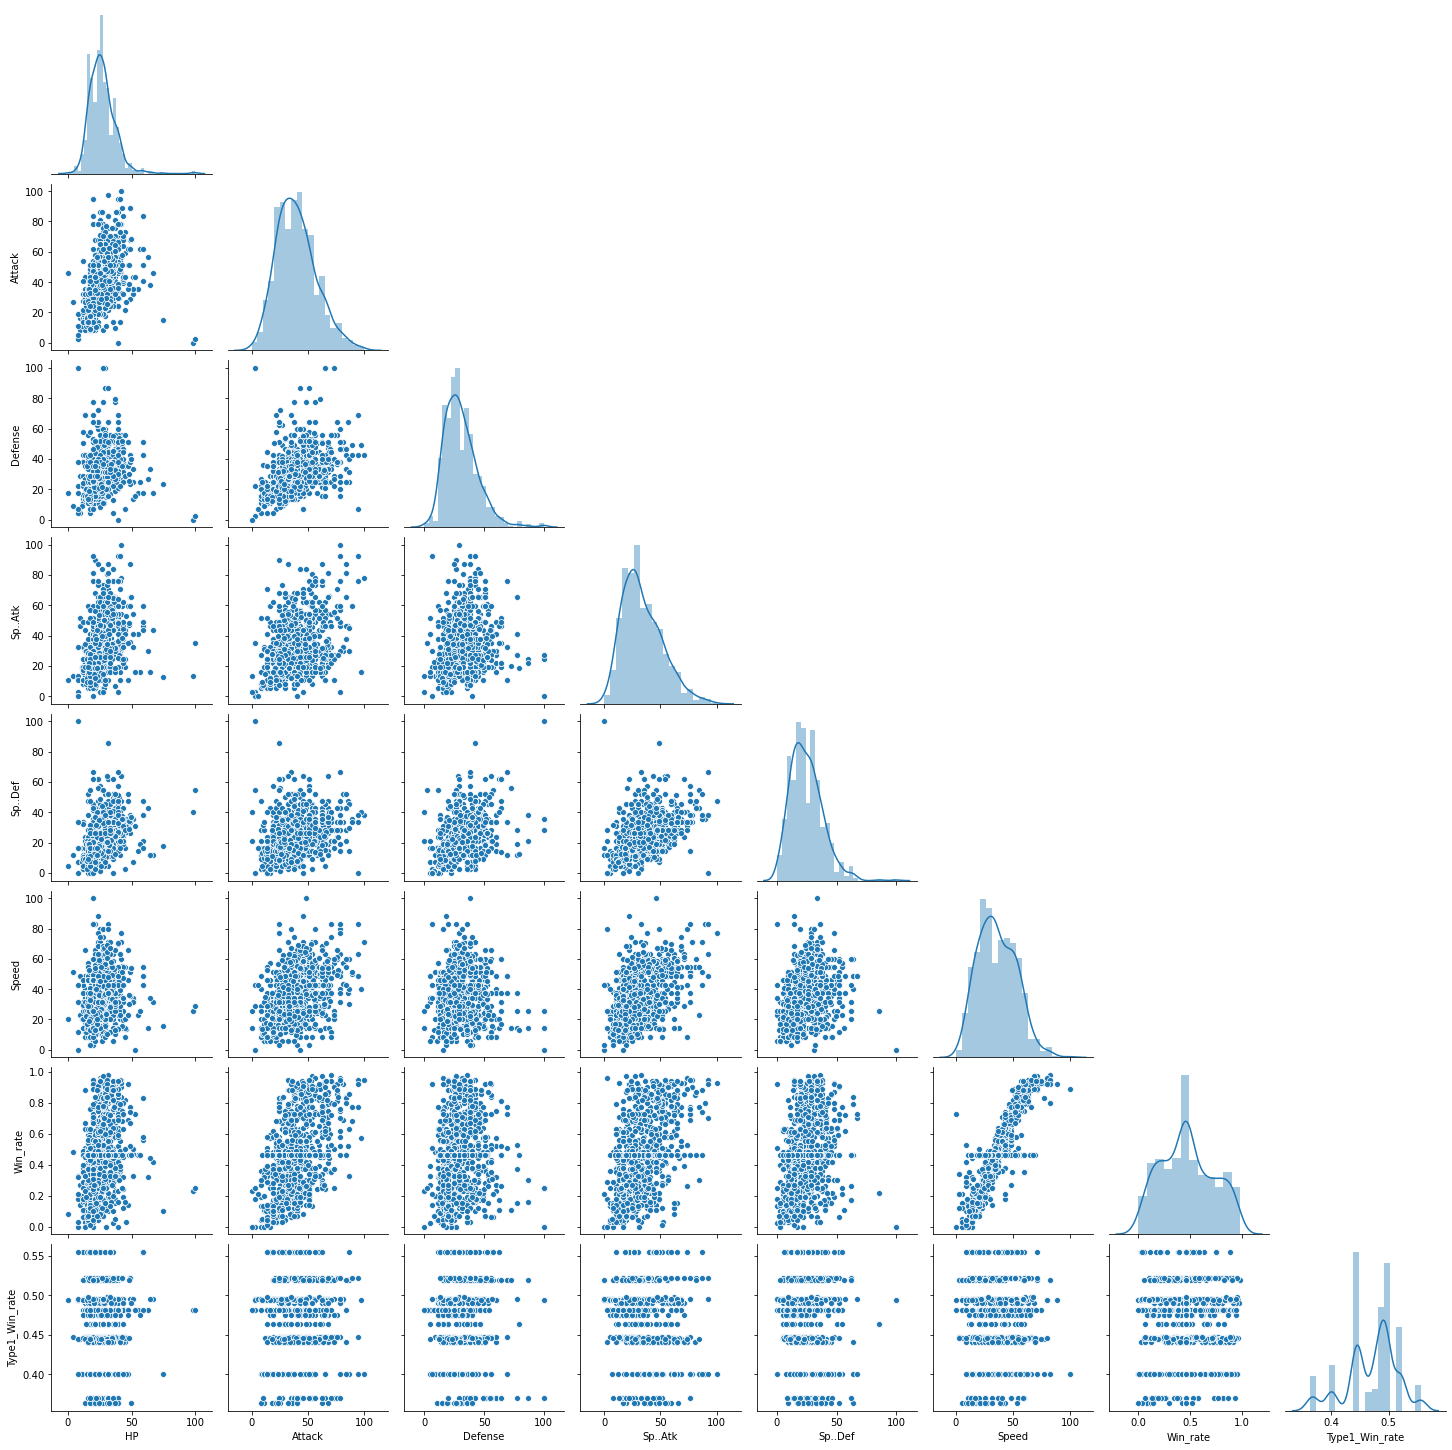

In [32]:
# Distribution of the quantitative variable
quant_data=data.loc[:,['HP','Attack','Defense','Sp..Atk','Sp..Def','Speed','Win_rate','Type1_Win_rate']]
quant_data.head()

dist_plt= sns.PairGrid(data=quant_data, diag_sharey=False, corner=True)
dist_plt.map_lower(sns.scatterplot)
#dist_plt.map_diag(sns.kdeplot)
dist_plt.map_diag(sns.distplot)
#plt.savefig('distribution.png')

### Visualize outliers in quantitative variables

Text(0.5, 1.0, 'Box-plot for Continuous Variable')

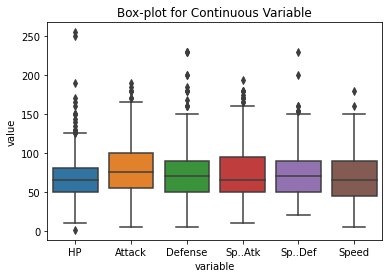

In [17]:
#Box-plot for outlier
y=quant_data.melt(value_vars=['HP','Attack','Defense','Sp..Atk','Sp..Def','Speed'])
sns.boxplot(x='variable',y='value', data=y)
plt.title("Box-plot for Continuous Variable")
#plt.savefig("Box-plot.png")

# Task 4
### Comparison of various categorical variables

Text(0.5, 1.0, 'Count of Legendary Pokemon Based on Type 1 Characteristic')

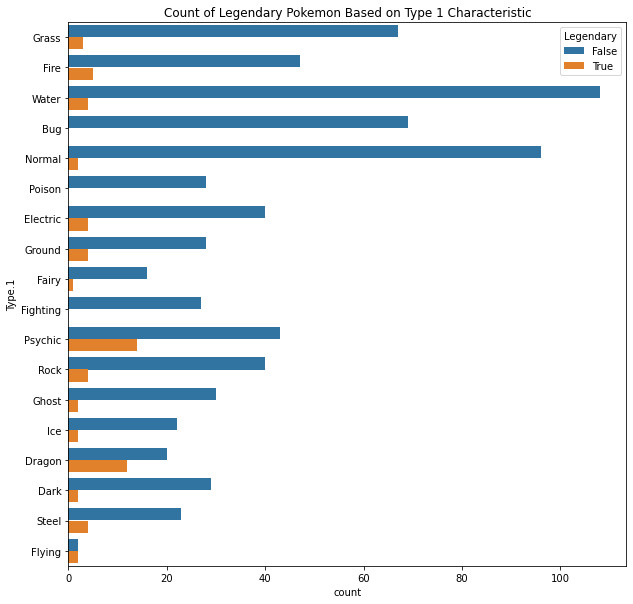

In [18]:
plt.figure(figsize=(10,10))
sns.countplot(data=data, y='Type.1', hue='Legendary')
plt.title('Count of Legendary Pokemon Based on Type 1 Characteristic')
#plt.savefig('Legendary_type_count')

##### Proportion of Legendary Pokemon w.r.t their Types

Text(0.5, 1.0, 'Proportion of Legendary Pokemon from Type 1')

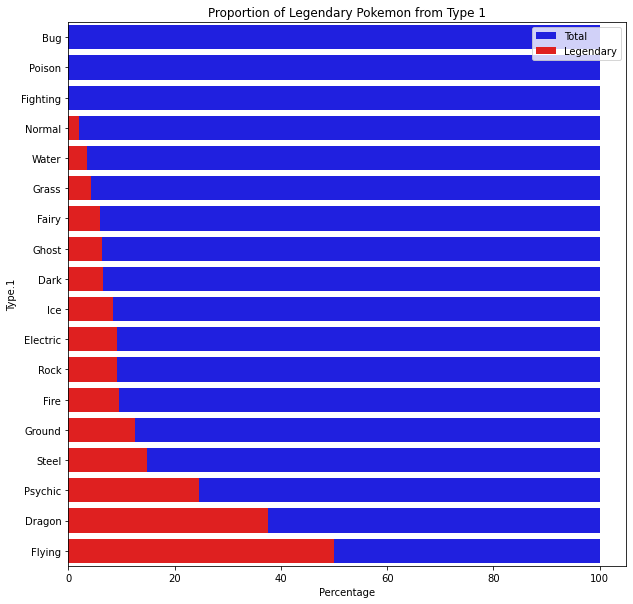

In [19]:
#slicing the needed data
type_comparision = data.loc[:,['Type.1','Legendary']]

#grouping by the 'legendary' and type
cat_data=type_comparision.groupby(by=['Legendary', 'Type.1'], sort=True).agg({'Type.1':'count'})

#unstackign the nested df
cat_data_unnest=cat_data.unstack(level=0)

#Filling the NA with 0 as that type of pokemon is not available
cat_data_unnest=cat_data_unnest.fillna(value=0)

#Extracting the needed data from the unnested df
cat_data_unnest=cat_data_unnest['Type.1']
cat_data_unnest=cat_data_unnest.reset_index()

#calculating the total of legendary and not-legendary plus storing in new column
cat_data_unnest['Total']=cat_data_unnest[True]+cat_data_unnest[False]
cat_data_unnest['Total_Percent']=100

#calulating the true percentage as well as false
cat_data_unnest['True_Percent']=round((cat_data_unnest[True]/cat_data_unnest['Total'])*100,2)
cat_data_unnest['False_Percentage']=round((cat_data_unnest[False]/cat_data_unnest['Total'])*100,2)

#sorting in ascending order
cat_data_unnest=cat_data_unnest.sort_values(by='True_Percent')

#plot
plt.figure(figsize=(10,10))

#first plot for total
sns.barplot(y='Type.1', x='Total_Percent', data=cat_data_unnest, color='b', label='Total')

#stacking the true proportion on the top of total for stacked effect
sns.barplot(y='Type.1', x='True_Percent', data=cat_data_unnest, color='r', label='Legendary')
plt.xlabel("Percentage")
plt.legend()
plt.title("Proportion of Legendary Pokemon from Type 1")
#plt.savefig("Prop_leg_type.png")

### Correlation heatmap

Text(0.5, 1.0, 'Correlation Plot')

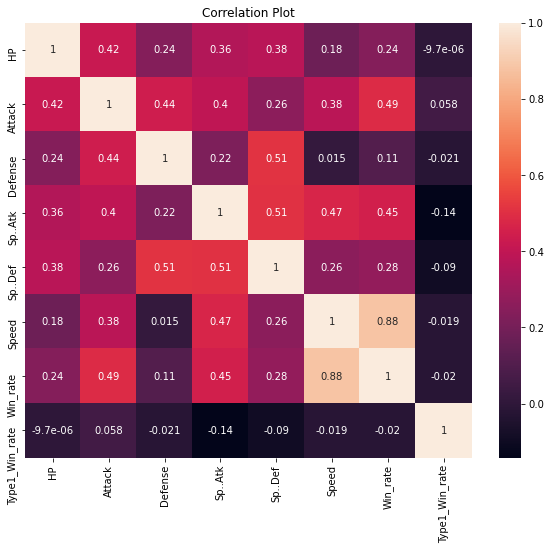

In [20]:
#Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(quant_data.corr(),annot=True)
plt.title("Correlation Plot")
#plt.savefig("corr_plt.png")

### Correlation table between quantitative variables

In [21]:
quant_data.corr()

,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Win_rate,Type1_Win_rate
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.241987,-0.000010
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.489370,0.058058
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.108246,-0.020675
Sp..Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.448385,-0.141382
Sp..Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.281417,-0.089867
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,0.883699,-0.018923
Win_rate,0.241987,0.489370,0.108246,0.448385,0.281417,0.883699,1.000000,-0.019706
Type1_Win_rate,-0.000010,0.058058,-0.020675,-0.141382,-0.089867,-0.018923,-0.019706,1.000000


### Compare each categorical and qualitative variable

Text(0.5, 1.0, 'Legendary Based on Type 1 and Total HP')

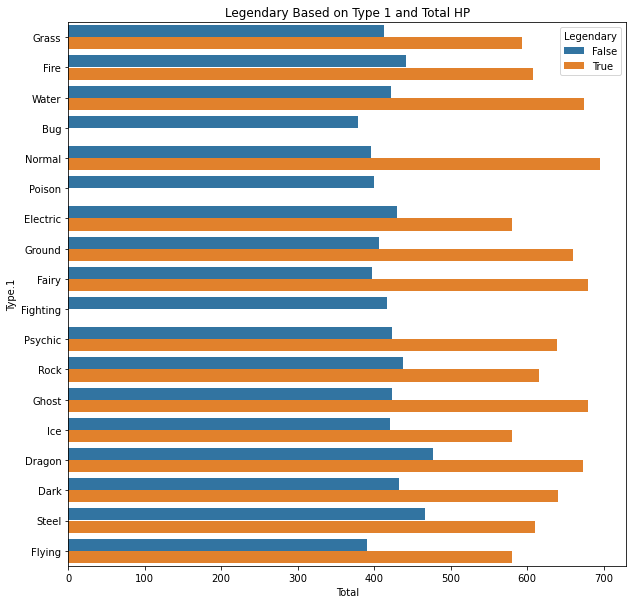

In [22]:
plt.figure(figsize=(10,10))
#sns.countplot(data=data, y='Type.1', hue='Legendary')
sns.barplot(x='Total', y='Type.1', hue='Legendary', data=data, ci=False)
plt.title("Legendary Based on Type 1 and Total HP")
#plt.savefig("Legendary_type1_total.png")

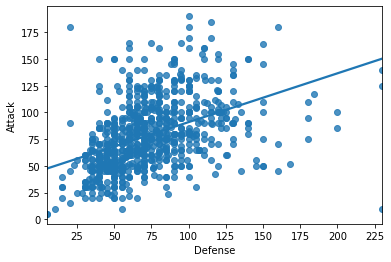

In [23]:
sns.regplot(data=data, x='Defense', y='Attack', ci=False)

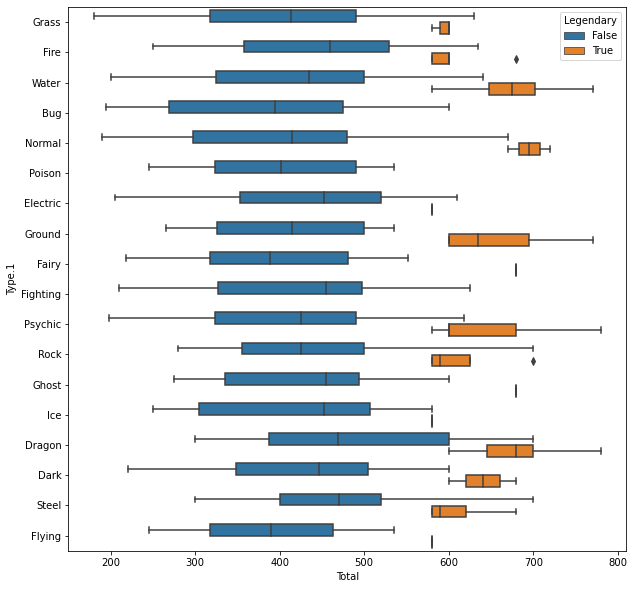

In [24]:
#box-plots for different type with total points
plt.figure(figsize=(10,10))
sns.boxplot(x='Total',y='Type.1', hue='Legendary',data=data)

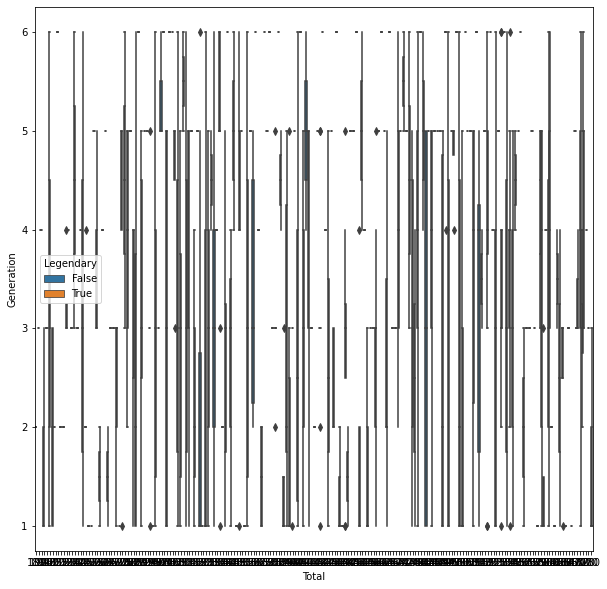

In [25]:
#boxplot for total and Generation with the Legendary Status
plt.figure(figsize=(10,10))
sns.boxplot(x='Total', y='Generation', hue='Legendary', data=data)

### Task 5

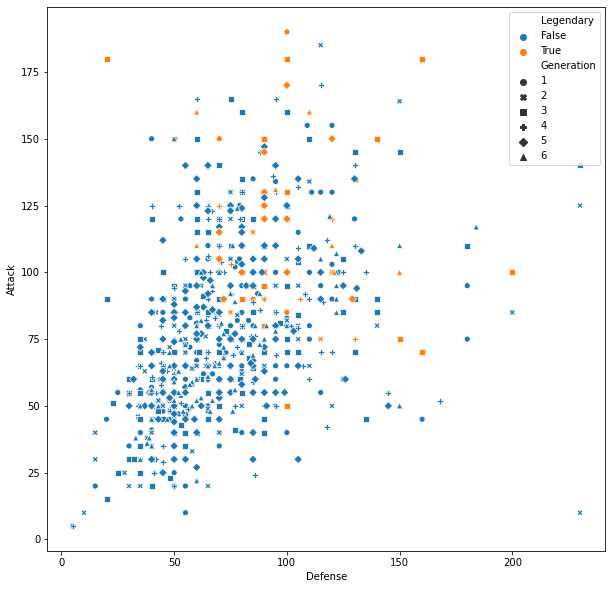

In [26]:
plt.figure(figsize=(10,10))

#changing the 'Generation' to categorical variable
data.Generation = pd.Categorical(data.Generation)

sns.scatterplot(data=data, x='Defense', y='Attack', hue='Legendary', style='Generation')

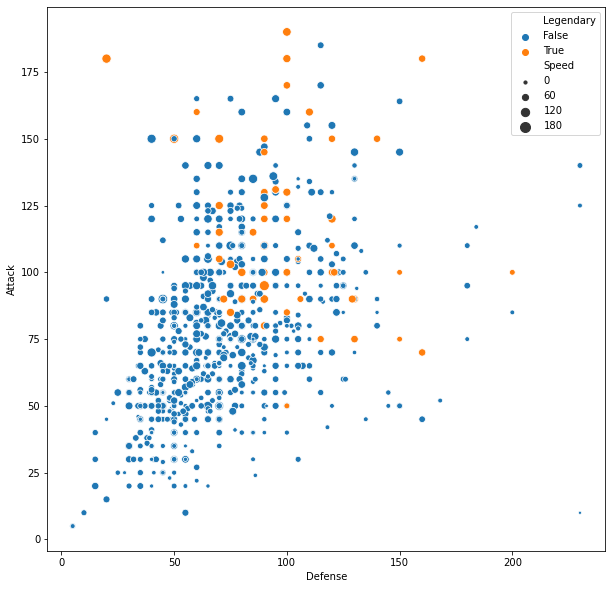

In [27]:
#scatter plot between defense and attack
plt.figure(figsize=(10,10))

sns.scatterplot(data=data, x='Defense', y='Attack', hue='Legendary', size='Speed',
               sizes=(10,100))

#plt.savefig("Four_variables.png")

### Radar chart comparing Pokemon attributes

In [29]:
# Create a list of columns for the attributes
stats = ['Speed','Attack','Defense','HP','Sp..Atk','Sp..Def']

# Convert the values of the attributes to a scale of 0-100
new_max = 100
new_min = 0
custom_range = new_max - new_min

for stat in stats:
    max_value = data[stat].max()
    min_value = data[stat].min()
    value_range = max_value - min_value
    data[stat] = data[stat].apply(lambda x: ((x-min_value)*custom_range)/value_range + new_min)

# Create a dataframe with our specified attributes  
df = data.loc[:,['Pokemon','Speed','Attack','Defense','HP','Sp..Atk','Sp..Def']]

df.set_index('Pokemon', inplace=True)

# Attributes to be plotted in the radar plot
labels = ['Speed','Attack','Defense','HP','Sp..Atk','Sp..Def']
variable_total = len(labels)

# Split the circle into evven parts based on the number of attributes
angles = np.linspace(0, 2*np.pi, variable_total, endpoint=False).tolist()
angles += angles[:1]

# Initialize the figure for the plot
plt.figure(figsize=(6,6))
ax = plt.subplot(polar=True)

# Create a function that will take the name of the Pokemon and its color on the graph and plot it on the radar chart
def add_pokemon(Pokemon, color):
    values = df.loc[Pokemon].tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, label=Pokemon)
    ax.fill(angles, values, color=color, alpha=0.25)

#Call functions
add_pokemon('CharizardMega Charizard X', 'Blue')
add_pokemon('BeedrillMega Beedrill', 'Red')
add_pokemon('MewtwoMega Mewtwo Y', 'Yellow')

# Styling the radar plot
ax.set_theta_offset(np.pi/2)
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(angles), labels)
ax.set_ylim(0, 100)
ax.set_title('Pokemon Attributes', y = 1.1)
ax.legend(loc=0, bbox_to_anchor=(1.9,1.2))

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

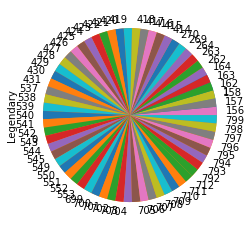

In [39]:
c= data['Legendary'].astype(int)
c.value_counts().sort_values().plot(kind='pie')
data['Legendary'].astype(int).plot.pie()